# AEROSOLBE1TURN.C1 Plots

[Click here](https://www.arm.gov/capabilities/vaps/aerosolbe) for more information about this vap.

In [1]:
%matplotlib widget
import ipywidgets as widgets

import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
import pandas as pd
import os
from datetime import datetime

import act
import xarray as xr

# Data archive directory
DATA_DIR = r'/data/archive/'

# Datastream info
DATASTREAM_NAME = 'aerosolbe1turn'
DATA_LEVEL = 'c1'
LOCATIONS = [{'end_date': '2021-04-30', 'facility': 'C1', 'site': 'sgp', 'start_date': '2001-01-01'}]

## Define site, facility, and date range

In [2]:
print("The following locations and date ranges are available for this VAP:")
display(pd.DataFrame(LOCATIONS, columns=['site', 'facility', 'start_date', 'end_date']))

The following locations and date ranges are available for this VAP:


,site,facility,start_date,end_date
0,sgp,C1,2001-01-01,2021-04-30


#### Define site, facility, and date range (date format: YYYY-MM-DD) using the variables below:

In [3]:
site_facility = ( 'sgp', 'C1' )

date_start = '2021-03-30'
date_end = '2021-04-01'

## Load data files
Load data files from /data/archive/

In [4]:
# Compile list of files
site, facility = site_facility
d_date_start = datetime.strptime(date_start, '%Y-%m-%d')
d_date_end = datetime.strptime(date_end, '%Y-%m-%d')
dir_path = os.path.join(DATA_DIR + site, site + DATASTREAM_NAME + facility + r'.' + DATA_LEVEL )
dir_path


'/data/archive/sgp/sgpaerosolbe1turnC1.c1'

In [5]:
from datetime import date, timedelta
import pandas as pd

def get_ARM_formated_dates(start_date, end_date):
    """
    Get a list of ARM conventional formated date lists, based on start_date and end_date(inclusive)
    EXAMPLE:
    get_ARM_formated_dates(start_date="20180219", end_date="20180221")
    >> ["20180219", "20180220", "20180221"] 
    """
    
    _start_date = pd.to_datetime(start_date)
    _end_date = pd.to_datetime(end_date)
    
    delta = _end_date - _start_date   # returns timedelta    
    dates = []

    for i in range(delta.days + 1):
        day = _start_date + timedelta(days=i)
        day_formated = day.strftime(format="%Y%m%d")
        dates.append(day_formated)
    return dates


get_ARM_formated_dates(start_date=date_start, end_date=date_end)

['20210330', '20210331', '20210401']

In [6]:
# Filter a list of files based on date pattern
import glob
dates = get_ARM_formated_dates(start_date=date_start, end_date=date_end)
files_filter = []
for date in dates:
    files_filter += glob.glob(f'{dir_path}/*.{date}*.*')
    files_filter
files_filter

['/data/archive/sgp/sgpaerosolbe1turnC1.c1/sgpaerosolbe1turnC1.c1.20210401.000000.cdf']

In [7]:
# Load files as a single dataset
files_list = files_filter 
ds = act.io.armfiles.read_netcdf(files_list)
ds.clean.cleanup()
print(f'{len(files_list)} files loaded')
ds


/tmp/ipykernel_1060/3004971396.py:3: DeprecationWarning: act.io.armfiles.read_netcdf will be replaced in version 2.0.0 by act.io.arm.read_arm_netcdf()
  ds = act.io.armfiles.read_netcdf(files_list)
ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


1 files loaded


<xarray.Dataset>
Dimensions:                                   (time: 4320, height: 177,
                                               height_rl: 192, parameter: 2)
Coordinates:
  * time                                      (time) datetime64[ns] 2021-04-0...
  * height                                    (height) float32 0.117 ... 6.981
  * height_rl                                 (height_rl) float32 nan ... nan
  * parameter                                 (parameter) int32 1 2
Data variables: (12/129)
    base_time                                 datetime64[ns] 2021-04-01
    time_offset                               (time) datetime64[ns] 2021-04-0...
    qc_time                                   (time) int32 dask.array<chunksize=(4320,), meta=np.ndarray>
    be_aod_500                                (time) float32 dask.array<chunksize=(4320,), meta=np.ndarray>
    qc_be_aod_500                             (time) int32 dask.array<chunksize=(4320,), meta=np.ndarray>
    source_be_aod_500                         (time) int32 dask.array<chunksize=(4320,), meta=np.ndarray>
    ...                                        ...
    ratio_Bbs_R_1um                           (time, height) float32 dask.array<chunksize=(4320, 177), meta=np.ndarray>
    ratio_Bbs_G_1um                           (time, height) float32 dask.array<chunksize=(4320, 177), meta=np.ndarray>
    ratio_Bbs_B_1um                           (time, height) float32 dask.array<chunksize=(4320, 177), meta=np.ndarray>
    lat                                       float32 ...
    lon                                       float32 ...
    alt                                       float32 ...
Attributes: (12/20)
    command_line:                   aerosolbe1turn -n aerosolbe -b 20210401 -...
    process_version:                Exp
    dod_version:                    aerosolbe1turn-c1-1.2
    site_id:                        sgp
    platform_id:                    aerosolbe1turn
    facility_id:                    C1
    ...                             ...
    input_datastreams:              sgpmfrsraod1michC1.c1 : 1.13 : 20210401.0...
    history:                        created by user dsmgr on machine zinc at ...
    _file_dates:                    ['20210401']
    _file_times:                    ['000000']
    _datastream:                    sgpaerosolbe1turnC1.c1
    _arm_standards_flag:            1

## Plot time series data
#### Define the list of variables to be plotted:

In [8]:
variables_to_plot = ['be_aod_500', 'be_aod_355', 'be_angstrom_exponent']

0.3.0


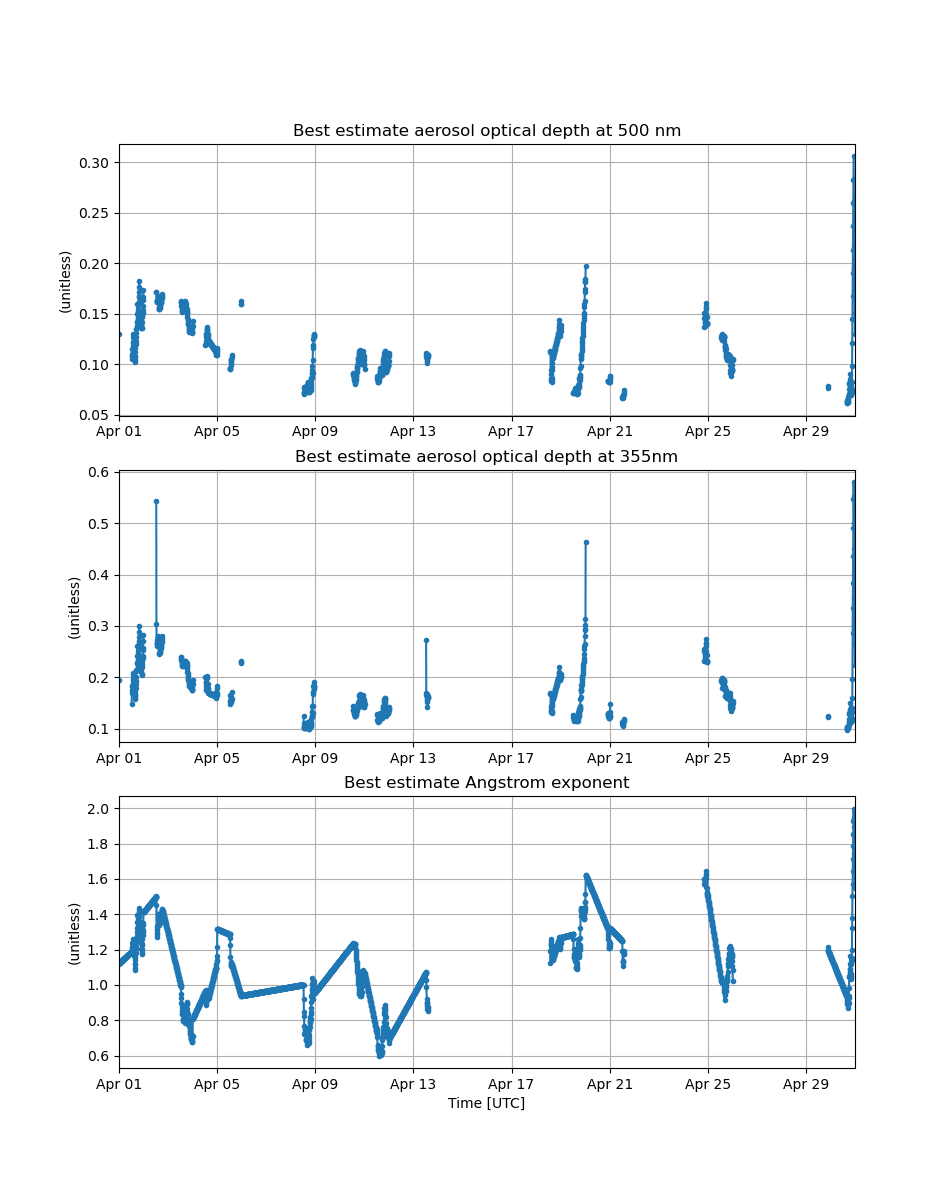

In [9]:
ts_display = act.plotting.TimeSeriesDisplay(ds)
ts_display.add_subplots((len(variables_to_plot),), figsize = (9.5,4*len(variables_to_plot)))

for i,v in enumerate(variables_to_plot):
    ts_ax = ts_display.plot(v, subplot_index=(i,), set_title=ds.variables[v].attrs['long_name'],)
    ts_ax.grid()

plt.show()


## Quality check plots
#### Define variable for QC plot

In [10]:
qc_variable = 'be_aod_500'

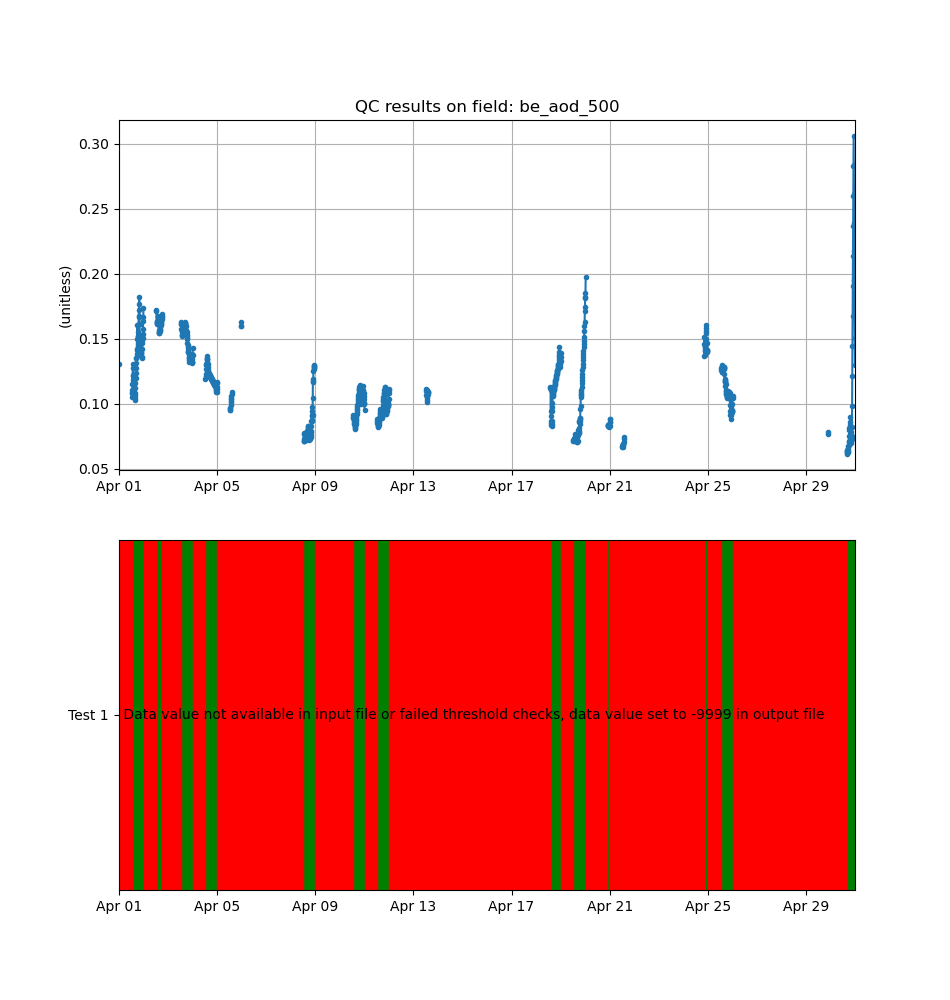

In [11]:
# QC Plot
if ('qc_'+qc_variable) in ds.variables:

    # Plot
    qc_display = act.plotting.TimeSeriesDisplay(ds)
    qc_display.add_subplots((2,), figsize = (9.5,10))
    qc_ax = qc_display.plot(qc_variable, subplot_index=(0,), set_title="QC results on field: " + qc_variable,)
    qc_ax.grid()
    qc_display.qc_flag_block_plot(qc_variable, subplot_index=(1,))

    plt.show()
else:
    print(f'QC not available for the selected field: {qc_variable}')


## Field selection dropdown menu
Select variable to be plotted from a dropdown menu

In [12]:
plt.ioff()

# populate dropdown menu with available variables 
available_variables = [v for v in ds.variables if not('time' in v or v.startswith('qc_') or v.startswith('source_')) and 'long_name' in ds.variables[v].attrs]
d_variable = 'be_aod_500'
dropdown = widgets.Dropdown(
    options = [(ds.variables[v].attrs['long_name'], v) for v in available_variables],
    value= d_variable,
    description='Field:',
    disabled=False,
)
dropdown.layout.margin = '0px 30% 0px 20%'
dropdown.layout.width = '50%'

# set up display
i_display = act.plotting.TimeSeriesDisplay(ds)
i_display.add_subplots((1,), figsize = (9.5,5))
i_ax = i_display.plot(d_variable, subplot_index=(0,), set_title=ds.variables[d_variable].attrs['long_name'],)
i_ax.grid()
i_fig = i_display.fig

# update plot callback function
def update_plot(change):
    i_ax.cla()
    i_ax_new = i_display.plot(change.new, subplot_index=(0,), set_title=ds.variables[change.new].attrs['long_name'],)
    i_ax_new.grid()
    i_fig.canvas.draw()
    i_fig.canvas.flush_events()

dropdown.observe(update_plot, names='value')

widgets.AppLayout(
    header=dropdown,
    center=i_fig.canvas,
    pane_heights=[1, 6,1]
)


AppLayout(children=(Dropdown(description='Field:', layout=Layout(grid_area='header', margin='0px 30% 0px 20%',…